<h2>Classification Tree - Flight Delays Dataset</h2>

In [1]:
# 1.
# Load the libraries we will need, including the algorithm, DecisionTreeClassifier.

print('Loading libraries.')
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

print('Done.')

Loading libraries.
Done.


In [2]:
# 2.
# Load the FlightDelays dataset.  The data is in the FlightDelays.csv file, which should be in the /Data directory (folder) of 
# this Jupyter Notebook.  The data is loaded into a Python dataframe we will call df.  Print information
# about the data; i.e., size, dimensions, et., so we can understand the volume, the number of rows (instances) 
# and columns (features) with which we are working.

print('Loading data.')
df = pd.read_csv('Data/FlightDelays.csv')
print('Done.')

# dataframe.size
size = df.size
  
# dataframe.shape
shape = df.shape

# printing size and shape
print("Size = {}\nShape = {}".format(size, shape))
print('Rows: ', df.shape[0])
print('Cols: ', df.shape[1])

Loading data.
Done.
Size = 19809
Shape = (2201, 9)
Rows:  2201
Cols:  9


In [3]:
# 3.  Show the first five rows of the Iris dataset.

df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DISTANCE,FL_DATE,Weather,DAY_WEEK,DAY_OF_MONTH,Flight_Status
0,1455,OH,1455,184,1/1/04,0,4,1,ontime
1,1640,DH,1640,213,1/1/04,0,4,1,ontime
2,1245,DH,1245,229,1/1/04,0,4,1,ontime
3,1715,DH,1709,229,1/1/04,0,4,1,ontime
4,1039,DH,1035,229,1/1/04,0,4,1,ontime


In [4]:
# 4.  Display information about the Iris dataset features.

df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,1.000000,7.000000,31.000000


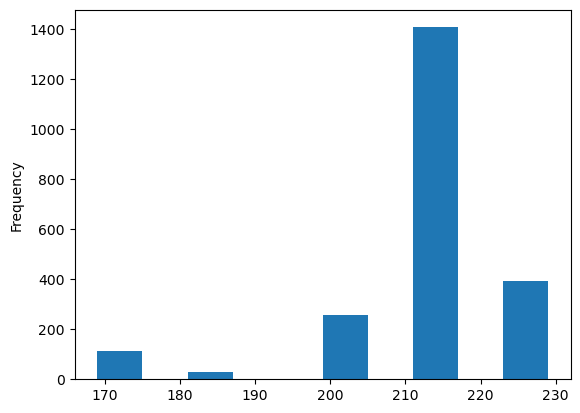

In [5]:
# 5.  Plot the frequency of the size of any feature in a histogram.
#     Edit the code to change the name of the feature.

df['DISTANCE'].plot.hist()
plt.show()

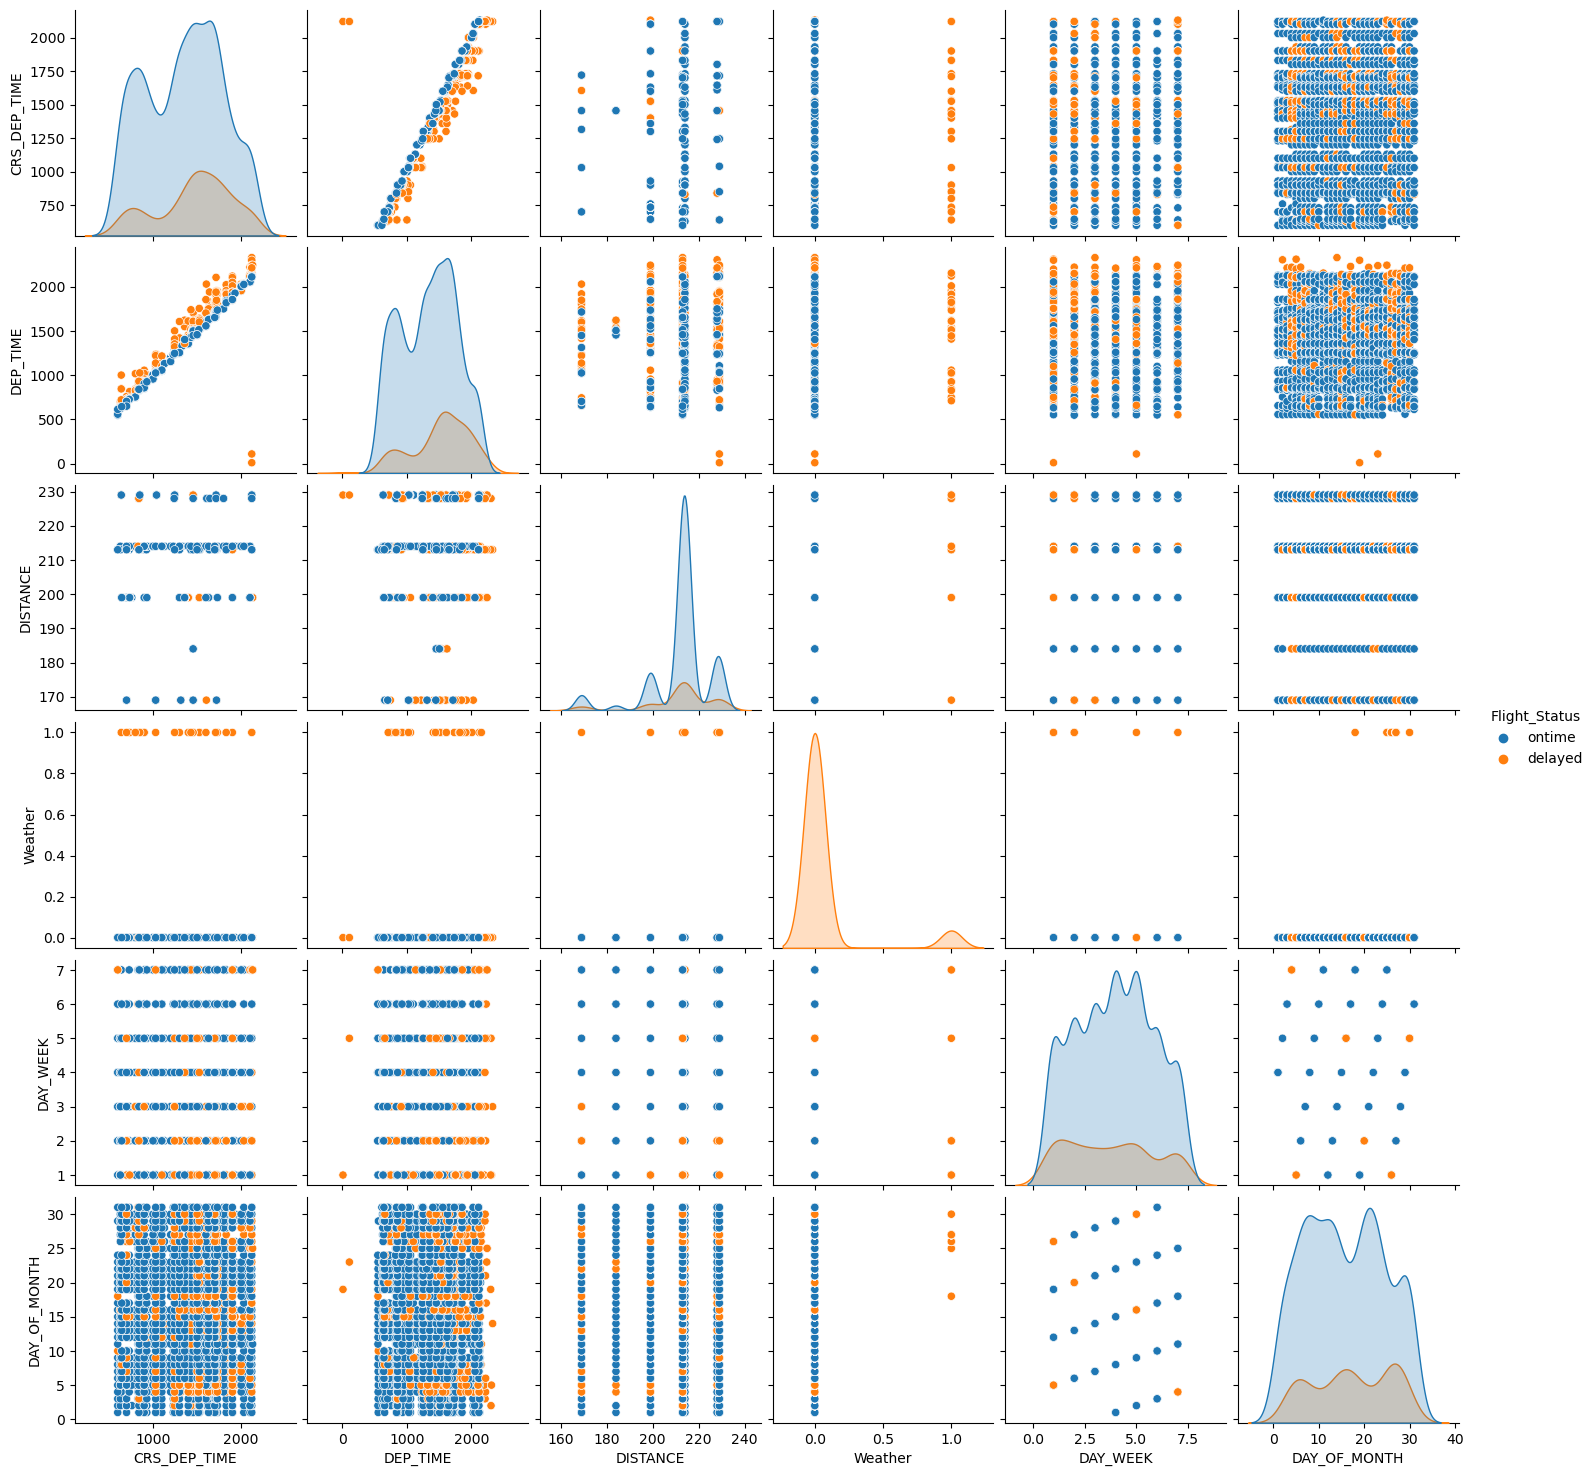

In [6]:
# 6.  Generate a pairplot of the features and label.

sns.pairplot(df, hue='Flight_Status')

In [7]:
# 7.  Randomly split the dataset into training and testing dataframes.
#     Edit the variable train_size to change the size of the training
#     dataframe.  Example: setting train_size=0.6 will create a random
#     training dataframe of 60% of the dataset and a testing dataframe
#     of 40% of the dataset.

train_size = 0.7

# CRS_DEP_TIME 	CARRIER 	DEP_TIME 	DISTANCE 	FL_DATE 	Weather 	DAY_WEEK 	DAY_OF_MONTH 	Flight_Status

print('Randomly splitting the dataset into training and testing dataframes.\n')

# Enter which feature (column value) will be the label.
all_classes = df['Flight_Status'].values

# Enter the other features that will be the independent variables.
all_inputs = df[['CRS_DEP_TIME', 
                 'DEP_TIME', 
                 'DISTANCE', 
                 'Weather', 
                 'DAY_WEEK', 
                 'DAY_OF_MONTH']].values

# Randomly split the dataframe into training and testing data.
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=train_size, random_state=1)
print('Training dataframe is {:4.1f}'.format(train_size * 100), '% of the dataset: {:3.0f}'.format(len(train_inputs)), 'records.')
print('Testing dataframe is {:4.1f}'.format((1 - train_size) * 100), '% of the dataset: {:3.0f}'.format(len(test_inputs)), 'records.\n')
print('Done.')

Randomly splitting the dataset into training and testing dataframes.

Training dataframe is 70.0 % of the dataset: 1540 records.
Testing dataframe is 30.0 % of the dataset: 661 records.

Done.


In [8]:
# 8. 
# Train the model with the training dataframe.  Select the hyperparameters you wish to use:
# criterion - choose how you want to govern the training: gini, entropy, log_loss
# max_depth - restrict the tree depth to a number (integer), or None to not limit it's depth


criterion = 'gini'
max_depth = None

print('Training the model.')
dtc = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth)
dtc.fit(train_inputs, train_classes)
print('Done.')

Training the model.
Done.


In [9]:
# 9.  Show the accuracy score.

print('Training data accuracy {:.2f}'.format(dtc.score(train_inputs, train_classes)*100),'%')
print('Testing data accuracy {:.2f}'.format(dtc.score(test_inputs, test_classes)*100),'%')

Training data accuracy 99.94 %
Testing data accuracy 82.90 %


[Text(0.4796559846072187, 0.9782608695652174, 'Weather <= 0.5\ngini = 0.317\nsamples = 1540\nvalue = [304, 1236]\nclass = delayed'),
 Text(0.47540970010615713, 0.9347826086956522, 'DEP_TIME <= 2147.5\ngini = 0.304\nsamples = 1520\nvalue = [284, 1236]\nclass = delayed'),
 Text(0.47116341560509556, 0.8913043478260869, 'DEP_TIME <= 1504.5\ngini = 0.293\nsamples = 1504\nvalue = [268, 1236]\nclass = delayed'),
 Text(0.3297173566878981, 0.8478260869565217, 'DEP_TIME <= 329.5\ngini = 0.21\nsamples = 882\nvalue = [105, 777]\nclass = delayed'),
 Text(0.3254710721868365, 0.8043478260869565, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = ontime'),
 Text(0.33396364118895966, 0.8043478260869565, 'DAY_OF_MONTH <= 25.5\ngini = 0.207\nsamples = 880\nvalue = [103, 777]\nclass = delayed'),
 Text(0.22259819532908706, 0.7608695652173914, 'DAY_OF_MONTH <= 16.5\ngini = 0.182\nsamples = 722\nvalue = [73, 649]\nclass = delayed'),
 Text(0.1434447983014862, 0.717391304347826, 'DAY_OF_MONTH <= 14.5\ngini = 0.

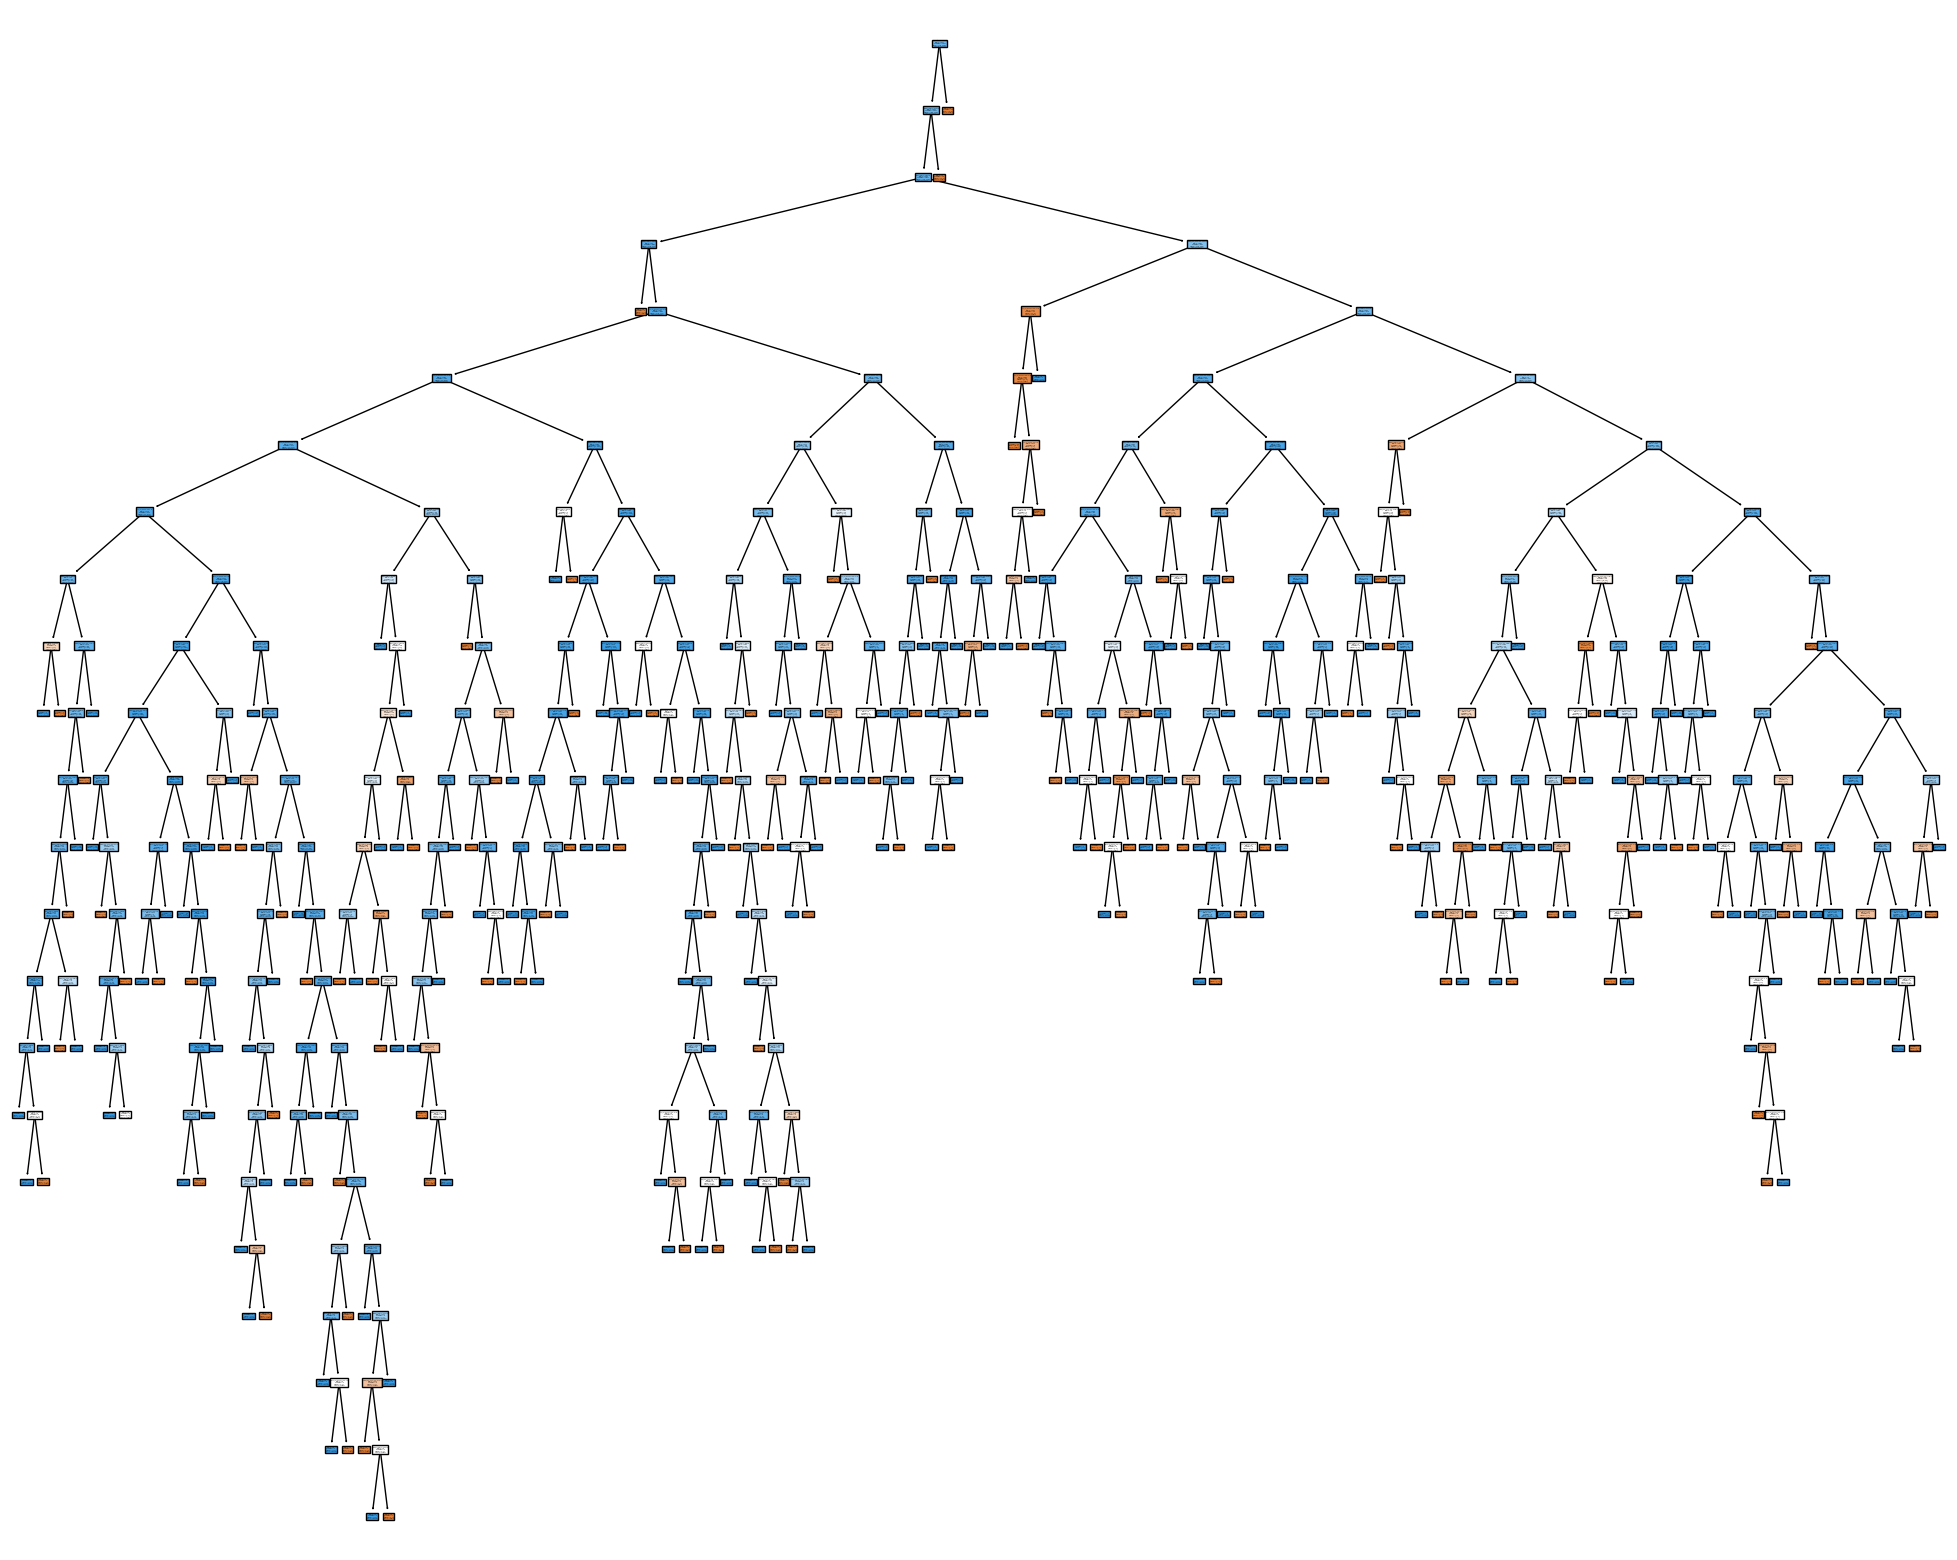

In [10]:
# 10.  Plot the classification tree.

fn = ['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'Weather', 'DAY_OF_WEEK', 'DAY_OF_MONTH']
cn = ['ontime', 'delayed']

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc, 
            feature_names=fn,  
            class_names=cn,
            filled=True)